In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
tf.__version__

'2.4.1'

# Loading Dataset

In [4]:
mnist = tf.keras.datasets.mnist # 28 * 28 images of integer from 0 to 9
mnist

<module 'tensorflow.keras.datasets.mnist' from '/opt/conda/lib/python3.7/site-packages/tensorflow/keras/datasets/mnist/__init__.py'>

# Normalisation/ Scaling

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #Train test split data
x_train_normalized = tf.keras.utils.normalize(x_train, axis=1)
x_test_normalized = tf.keras.utils.normalize(x_test, axis=1)

In [41]:
x_train.shape

(60000, 28, 28)

In [16]:
np.max(x_train), np.max(x_test)

(255, 255)

# Normalisation or Scaling can be done this way too

In [17]:
x_train_normalized = x_train/255
x_test_normalized = x_test/255

# Defining Model

In [61]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation= "relu"))
model.add(tf.keras.layers.Dense(100, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation="sigmoid"))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  #sparse_categorical_crossentropy
    metrics=['accuracy']
)

# Using Different Loss Function

In [34]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation= "relu"))
model.add(tf.keras.layers.Dense(100, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  #sparse_categorical_crossentropy
    metrics=['accuracy']
)

In [63]:
model.fit(x_train_normalized, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0262 - accuracy: 0.9918
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0217 - accuracy: 0.9929
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0209 - accuracy: 0.9931
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0185 - accuracy: 0.9934
Epoch 5/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0158 - accuracy: 0.9945
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0158 - accuracy: 0.9946
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0138 - accuracy: 0.9958


In [64]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (32, 784)                 0         
_________________________________________________________________
dense_27 (Dense)             (32, 100)                 78500     
_________________________________________________________________
dense_28 (Dense)             (32, 100)                 10100     
_________________________________________________________________
dense_29 (Dense)             (32, 10)                  1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


# Model Evaluation

In [67]:
val_loss, val_acc = model.evaluate(x_test_normalized, y_test)
val_loss, val_acc

313/313 [==============================] - 0s 2ms/step - loss: 0.1074 - accuracy: 0.9785


(0.10744994133710861, 0.9785000085830688)

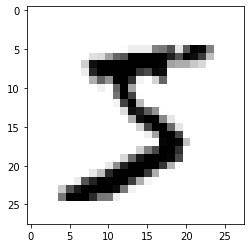

In [68]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [69]:
predictions = model.predict([x_test_normalized])

In [80]:
np.argmax(predictions[0]), y_test[0]

(7, 7)

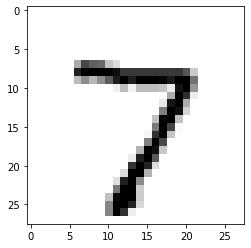

In [83]:
plt.imshow(x_test_normalized[0], cmap="binary")

# Plotting Confusion Matrix

In [75]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

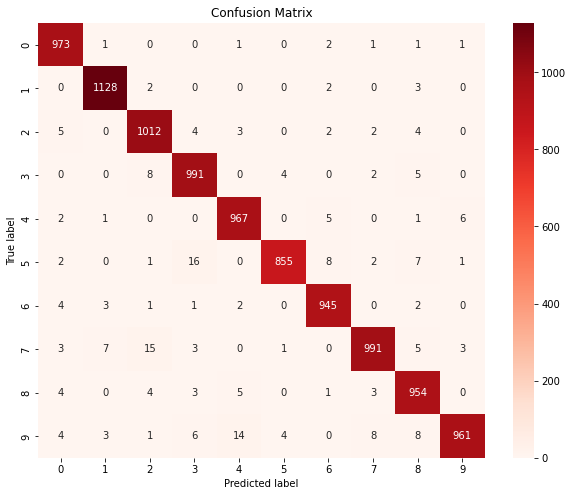

In [78]:
y_pred = model.predict(x_test_normalized)
y_pred_classes = [np.argmax(i) for i in y_pred]
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()